<a href="https://colab.research.google.com/github/tuananh11052000/CS114.K21/blob/master/detect_homan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [106]:
import glob
import cv2
import numpy as np
import os
import random
import skimage
from skimage import feature
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [107]:
class HOG:
    def __init__(self, orientations=12, pixelsPerCell=(4, 4), cellsPerBlock=(2, 2), normalize=True):
        # store the number of orientations, pixels per cell, cells per block, and
        # whether normalization should be applied to the image
        self.orientations = orientations
        self.pixelsPerCell = pixelsPerCell
        self.cellsPerBlock = cellsPerBlock
        self.normalize = normalize

    def describe(self, image):
        # compute Histogram of Oriented Gradients features for scikit-image < 0.13
        if int(skimage.__version__.split(".")[1]) < 13:
            
            hist = feature.hog(image, orientations=self.orientations, pixels_per_cell=self.pixelsPerCell,
                               cells_per_block=self.cellsPerBlock, transform_sqrt=self.normalize)

        # otherwise comput Histogram of Oriented Gradients features for scikit-image >= 0.13
        else:
            hist = feature.hog(image, orientations=self.orientations, pixels_per_cell=self.pixelsPerCell,
                               cells_per_block=self.cellsPerBlock, transform_sqrt=self.normalize, block_norm="L1")

        hist[hist < 0] = 0

        # return the histogram
        return hist

In [108]:
datasetPaths = []
labels = []
data = []
for linkimage in glob.iglob('/content/drive/My Drive/Colab Notebooks/CUOI KY/*/*.png', recursive=True):
    datasetPaths.append(linkimage);
    # print(linkimage.split(os.path.sep)[-2])
random.shuffle(datasetPaths)
for path in datasetPaths:
  labels.append(path.split(os.path.sep)[-2])
  data.append(cv2.imread(path, cv2.IMREAD_GRAYSCALE))

In [112]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(labels)
le.classes_
lb = le.transform(labels)

In [110]:
print(labels)
print(lb[6])
print(le.classes_)

['Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Ne

In [113]:
features = []
hog = HOG(orientations=12, pixelsPerCell=(4, 4), cellsPerBlock=(2, 2), normalize=True)
for img in data:
  features.append(hog.describe(img))

In [114]:
x_train, x_test, y_train, y_test = train_test_split(features, lb, test_size=0.25)

In [115]:
print(np.shape(x_train))

(1666, 22320)


In [116]:
model = SVC(kernel="linear", probability=False, random_state=42)
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

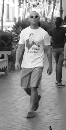

(22320,)
0


In [117]:
from sklearn.metrics import accuracy_score
img = cv2.imread("4.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (66, 130))
cv2_imshow(img)
temp = hog.describe(img)
print(np.shape(temp))
pred = model.predict([temp])
print(pred.argmax(axis=0))
# print('acc: ', accuracy_score(pred, y_test))